In [126]:
#######################
##  Library Imports  ##
#######################
import numpy as np
import h5py as h5
import sys
import os
from numba import njit
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = 'Computer Modern Roman'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import getopt
from itertools import zip_longest
import multiprocessing as mprocs
import time as TIME
from subprocess import Popen, PIPE
from matplotlib.pyplot import cm
from functions import tc, import_data, sim_data, import_data, import_spectra_data, import_post_processing_data

## Helper Functions

In [127]:
def spectra_accum(spec):
    spec_accum = np.empty_like(spec)
    spec_accum[0] = spec[0]
    for i in range(1, spec.shape[0]):
        spec_accum[i] = spec[i]
        spec_accum[i] += spec_accum[i - 1]
        
    return spec_accum

## Read in Data

In [128]:
data = "DECAY"
# data = "MAX_PALIN"
# data = "EXTRM_ENS"

In [242]:
if data == "DECAY":
    in_dir = "../Data/Test/SIM_DATA_NAVIER_RK4_FULL_N[16,16]_T[0-5]_NU[0.000031]_CFL[0.90]_u0[DECAY_TURB_ALT]_TAG[Test-Test]/"
    post_file_path = in_dir + "PostProcessing_HDF_Data_SECTORS[24]_KFRAC[0.75]_TAG[Test-Test].h5"
elif data == "MAX_PALIN":
    in_dir = "../Data/Test/SIM_DATA_NAVIER_RK4_FULL_N[64,64]_T[0-0]_NU[0.001000]_CFL[0.90]_u0[MAX_PALIN]_TAG[Max-Palin-Test]/"
    post_file_path = in_dir + "PostProcessing_HDF_Data_SECTORS[1]_KFRAC[0.75]_TAG[Max-Palin-Test].h5"
elif data == "EXTRM_ENS":
    in_dir = "../Data/Test/SIM_DATA_NAVIER_RK4_FULL_N[64,64]_T[0-0]_NU[0.000010]_CFL[0.90]_u0[EXTRM_ENS]_TAG[Extrm-Enst-Test]/"
    post_file_path = in_dir + "PostProcessing_HDF_Data_SECTORS[1]_KFRAC[0.75]_TAG[Extrm-Enst-Test].h5"

In [243]:
# -----------------------------------------
# # --------  Read In data
# -----------------------------------------
## Read in simulation parameters
sys_vars = sim_data(in_dir)

## Read in solver data
run_data = import_data(in_dir, sys_vars)

## Read in spectra data
spec_data = import_spectra_data(in_dir, sys_vars)

## Read in post processing data
post_data = import_post_processing_data(post_file_path, sys_vars, 'file')

print(post_data.enst_flux_per_sec[-100, 0, :])
print(post_data.enst_flux_per_sec[-100, 1, :])

print(post_data.num_triads[1, :])

## NOTE: 8 Sectors is weird, none of the sectors match up


Preparing real space vorticity... Finished!
[  -6685.2972023     -422.06325622   12655.84176539  -47415.89167929
    9190.64967724   31935.11898664 -152301.5156977   -10858.01957346
   -5490.46940643   46288.86456607  -25253.92751963    8075.75882525
   15341.54514343    -422.06325622   12655.84176539  -47415.89167929
    9190.64967724   31935.11898664 -152301.5156977   -10858.01957346
   -5490.46940643   46288.86456607  -25253.92751963    8075.75882525]
[ -8675.13560001   -358.6224607   12065.4846191  -41805.9113841
  10257.68606771  24531.39275994   -484.75581816  -1250.65957901
  -1420.20076807  29325.37602345 -29092.34664072  -3930.8023719
 -17273.09147473   -358.6224607   12065.4846191  -41805.9113841
  10257.68606771  24531.39275994   -484.75581816  -1250.65957901
  -1420.20076807  29325.37602345 -29092.34664072  -3930.8023719 ]
[ 38  30  29 184  70  32 154  31  31 186  71  33 156  30  29 184  70  32
 154  31  31 186  71  33]


In [253]:
with h5.File('/home/ecarroll/PhD/2D_Navier_Stokes/Data/PostProcess/PhaseSync/Wavevector_Data_N[16,16]_SECTORS[24]_KFRAC[0.75].h5') as f:
    num_wave_vec_sec1 = f["NumWavevectors"][:, :]
    num = []
    for a in range(post_data.num_sect):
        for l in range(post_data.num_k1_sects):
            wv = f["WavevectorData_a[{}]_l[{}]".format(a, l)][:, :]
#             print("a: {} l: {} - {}".format(a, l, wv.shape))
            num.append(wv.shape[1])
print(np.sum(num_wave_vec_sec1[:, :], axis = 1))
for i in range(16):
    for j in range(wv.shape[1]):
        print(wv[i, j], end = " ")
    print()

[ 71 157 101 397 156  70 502 156 101 395 157  71 508 157 101 397 156  70
 502 156 101 395 157  71]
1.0 1.0 2.0 
-3.0 -2.0 -4.0 
0.0 0.0 -1.0 
-1.0 -2.0 0.0 
1.0 1.0 1.0 
-4.0 -4.0 -4.0 
10.0 5.0 20.0 
1.0 4.0 1.0 
17.0 17.0 17.0 
2.819842099193151 2.677945044588987 2.677945044588987 
3.141592653589793 3.141592653589793 -1.5707963267948966 
2.896613990462929 2.896613990462929 2.896613990462929 
-0.3217505543966422 -0.4636476090008061 -0.4636476090008061 
0.0 0.0 1.5707963267948966 
-0.24497866312686414 -0.24497866312686414 -0.24497866312686414 
0.0 0.0 0.0 


In [234]:
def check_list(in_list):
    for i in range(num_wave_vec_sec1[0, 0]):
        if in_list in sec_data[:6, i]:
            return True
        else:
            return False

In [36]:
sec_data = wave_vec_data_a0_l0_sec1[:6, :]
true_data = post_data.wave_vec_data_test

n = 0
for i in range(post_data.num_triads_test[0]):
    if check_list(true_data[:, i]) == True:
        continue
    else:
        n+=1
        print(i, true_data[:, i])
#     print(np.isin(sec_data[:6, i], true_data, a))
print(n)

17 [-2. -2. -2. -1. -4. -3.]
18 [-2. -1. -2. -2. -4. -3.]
21 [-1. -2. -3. -1. -4. -3.]
22 [-1. -1. -3. -2. -4. -3.]
29 [-2. -3. -2.  1. -4. -2.]
31 [-2. -1. -2. -1. -4. -2.]
33 [-2.  1. -2. -3. -4. -2.]
34 [-1. -3. -3.  1. -4. -2.]
36 [-1. -1. -3. -1. -4. -2.]
45 [-2. -3. -2.  2. -4. -1.]
46 [-2. -2. -2.  1. -4. -1.]
49 [-2.  1. -2. -2. -4. -1.]
50 [-2.  2. -2. -3. -4. -1.]
51 [-1. -3. -3.  2. -4. -1.]
52 [-1. -2. -3.  1. -4. -1.]
55 [-1.  1. -3. -2. -4. -1.]
69 [-2. -2. -2.  3. -4.  1.]
70 [-2. -1. -2.  2. -4.  1.]
73 [-2.  2. -2. -1. -4.  1.]
74 [-2.  3. -2. -2. -4.  1.]
75 [-1. -1. -3.  2. -4.  1.]
78 [-1.  2. -3. -1. -4.  1.]
79 [-1.  3. -3. -2. -4.  1.]
86 [-2. -1. -2.  3. -4.  2.]
88 [-2.  1. -2.  1. -4.  2.]
90 [-2.  3. -2. -1. -4.  2.]
92 [-1.  1. -3.  1. -4.  2.]
94 [-1.  3. -3. -1. -4.  2.]
101 [-2.  1. -2.  2. -4.  3.]
102 [-2.  2. -2.  1. -4.  3.]
104 [-1.  1. -3.  2. -4.  3.]
105 [-1.  2. -3.  1. -4.  3.]
108 [-3. -2.  0. -2. -3. -4.]
109 [-3. -1.  0. -3. -3. -4.]
114 [-1.

In [34]:
with h5.File('/home/ecarroll/PhD/2D_Navier_Stokes/Data/PostProcess/PhaseSync/Wavevector_Data_N[16,16]_SECTORS[8]_KFRAC[0.75].h5') as f:
    num_wave_vec_sec2 = f["NumWavevectors"]
    wave_vec_data_a0_l0_sec2 = f["WavevectorData_a[0]_l[0]"][:, :]
    wave_vec_data_a0_l1_sec2 = f["WavevectorData_a[0]_l[1]"][:, :]    
    wave_vec_data_a1_l0_sec2 = f["WavevectorData_a[1]_l[0]"][:, :]    
    wave_vec_data_a1_l1_sec2 = f["WavevectorData_a[1]_l[1]"][:, :]  
    
print(wave_vec_data_a0_l0_sec2.shape)
print(wave_vec_data_a0_l1_sec2.shape)
print(wave_vec_data_a1_l0_sec2.shape)
print(wave_vec_data_a1_l1_sec2.shape)

print()
print("First Sec: {}\tSecond Sec: {}\tMatch: {}\tSum: {}\tSum Match: {}".format(wave_vec_data_a0_l0_sec2.shape[1] + wave_vec_data_a0_l1_sec2.shape[1], 
                                                                                wave_vec_data_a1_l0_sec2.shape[1] + wave_vec_data_a1_l1_sec2.shape[1], 
                                                                                wave_vec_data_a0_l0_sec2.shape[1] + wave_vec_data_a0_l1_sec2.shape[1] == wave_vec_data_a1_l0_sec2.shape[1] + wave_vec_data_a1_l1_sec2.shape[1],
                                                                                wave_vec_data_a0_l0_sec2.shape[1] + wave_vec_data_a0_l1_sec2.shape[1] + wave_vec_data_a1_l0_sec2.shape[1] + wave_vec_data_a1_l1_sec2.shape[1],
                                                                                wave_vec_data_a0_l0_sec2.shape[1] + wave_vec_data_a0_l1_sec2.shape[1] + wave_vec_data_a1_l0_sec2.shape[1] + wave_vec_data_a1_l1_sec2.shape[1] == num_wave_vec_sec1[0, 0]))
print()
# print(wave_vec_data_a0_l0_sec2[-1, :])


print()
print()
t = np.arange(-np.pi, np.pi + 0.5, 2.0 * np.pi/2)
for i in range(2):
    for j in range(2):
        print(t[i], t[np.mod(i + j, 2)])


(16, 31)
(16, 39)
(16, 63)
(16, 56)

First Sec: 70	Second Sec: 119	Match: False	Sum: 189	Sum Match: False



-3.141592653589793 -3.141592653589793
-3.141592653589793 0.0
0.0 0.0
0.0 -3.141592653589793


In [ ]:
# for i in range(wave_vec_data_a0_l0_sec1.shape[1]):
#     print(i, np.all(np.isin(wave_vec_data_a0_l0_sec2[:6, i], wave_vec_data_a0_l1_sec2[:6, i])))
joined_list = np.append(wave_vec_data_a0_l0_sec2[:6, :], wave_vec_data_a0_l1_sec2[:6, :], axis = 1)
combined = np.append(wave_vec_data_a0_l0_sec1[:6, :], joined_list, axis = 1)
np.unique(combined, axis = 0).shape
# print(wave_vec_data_a0_l0_sec1[:6, -i], np.append(wave_vec_data_a0_l0_sec2[:6, :], wave_vec_data_a0_l1_sec2[:6, :], axis = -1)[:6, -i], np.all(wave_vec_data_a0_l0_sec1[:6, -i] == np.append(wave_vec_data_a0_l0_sec2[:6, :], wave_vec_data_a0_l1_sec2[:6, :], axis = -1)[:6, -i]))
# np.all(np.isin(wave_vec_data_a0_l0_sec1, wave_vec_data_a1_l0_sec2))
# print(np.all(np.isin(wave_vec_data_a0_l0_sec1, np.append(wave_vec_data_a0_l0_sec2, wave_vec_data_a0_l1_sec2))))
# print(np.append(wave_vec_data_a0_l0_sec2[:6, :], wave_vec_data_a0_l1_sec2[:6, :], axis = -1))

## Enstorphy Flux Compare: Nonlinear Term vs Simple Sectors

In [155]:
const_fac_sector = 4.0 * np.pi**2 
const_fac = 4.0 * np.pi**2 
norm_fac  = 0.5 / (sys_vars.Nx * sys_vars.Ny)**3

theta = 0 #int(post_data.num_sect // 2)
print(theta)

0


In [157]:
print("Test Type 0")
print((post_data.enst_flux_per_sec[:, 0, theta]  * const_fac_sector * norm_fac) / np.sum(post_data.enst_flux_C_theta[:, :], axis = -1))

for i in range(1, 5):
    print()
    triad_type = i
    print("Specific Triad Type = {}".format(triad_type))
    print((post_data.enst_flux_per_sec[:, triad_type, theta]) / (post_data.enst_flux_test[:, triad_type]))

print()
print(post_data.enst_flux_per_sec[:, :, :].shape)

Test Type 0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

Specific Triad Type = 1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

Specific Triad Type = 2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

Specific T

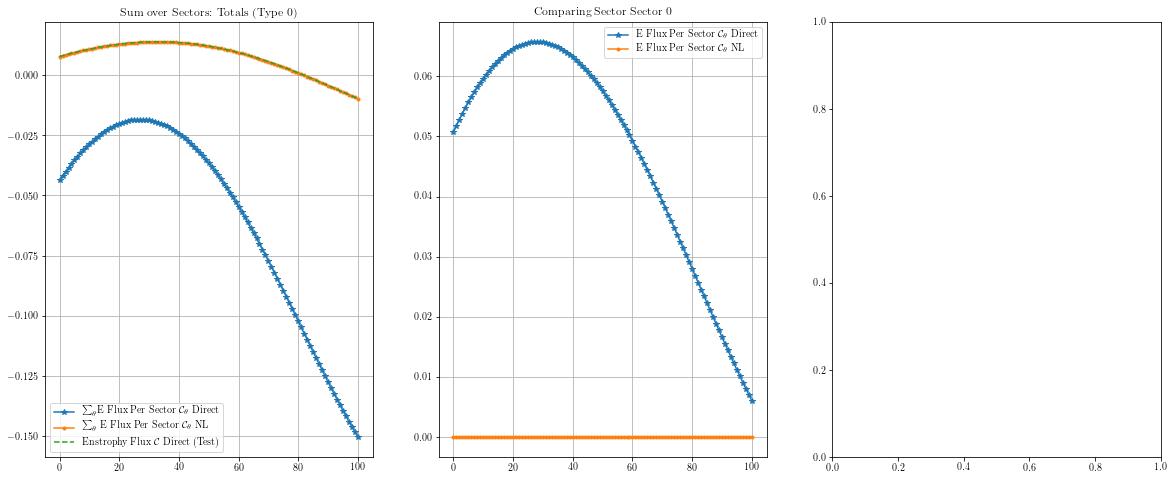

In [226]:
fig = plt.figure(figsize = (20, 8))
gs  = GridSpec(1, 3)
ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(np.sum(post_data.enst_flux_per_sec[:, 0, :], axis = -1) * const_fac * norm_fac, '*-')
ax2.plot(np.sum(post_data.enst_flux_C_theta[:, :], axis = -1), '.-')
ax2.plot(post_data.enst_flux_test[:, 0] * const_fac * norm_fac, '--')
ax2.set_title(r"Sum over Sectors: Totals (Type 0)")
ax2.grid()
ax2.legend([r"$\sum_\theta$E Flux Per Sector $\mathcal{C}_\theta$ Direct", r"$\sum_\theta$ E Flux Per Sector $\mathcal{C}_\theta$ NL", r"Enstrophy Flux $\mathcal{C}$ Direct (Test)"])

theta = 0
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(post_data.enst_flux_per_sec[:, 0, theta] * const_fac_sector * norm_fac, '*-')
ax1.plot(post_data.enst_flux_C_theta[:, theta], '.-')
ax1.set_title(r"Comparing Sector Sector {}".format(theta))
ax1.grid()
ax1.legend([r"E Flux Per Sector $\mathcal{C}_\theta$ Direct", r"E Flux Per Sector $\mathcal{C}_\theta$ NL", r"Enstrophy Flux $\mathcal{C}$"])


ax3 = fig.add_subplot(gs[0, 2])
# ax3.plot(post_data.enst_flux_per_sec[:, 0, 0] * const_fac_sector * norm_fac, '*-')
# ax3.plot(post_data.enst_flux_per_sec[:, 0, 1] * const_fac_sector * norm_fac, '*-')
# ax3.legend([r"Bottom", r"Top"])
# print(post_data.enst_flux_per_sec[:, 0, 0] / post_data.enst_flux_per_sec[:, 0, 1])
plt.show()

#### Triad Types Compare: Sectors vs All

[3.70709925e+11 3.69450457e+11 3.68317869e+11 3.67299067e+11
 3.66382633e+11 3.65558573e+11 3.64818101e+11 3.64153460e+11
 3.63557782e+11 3.63024963e+11 3.62549560e+11 3.62126705e+11
 3.61752034e+11 3.61421623e+11 3.61131932e+11 3.60879765e+11
 3.60662226e+11 3.60476686e+11 3.60320754e+11 3.60192251e+11
 3.60089187e+11 3.60009743e+11 3.59952250e+11 3.59915178e+11
 3.59897118e+11 3.59896775e+11 3.59912954e+11 3.59944551e+11
 3.59990545e+11 3.60049991e+11 3.60122012e+11 3.60205795e+11
 3.60300583e+11 3.60405672e+11 3.60520404e+11 3.60644168e+11
 3.60776391e+11 3.60916537e+11 3.61064105e+11 3.61218625e+11
 3.61379654e+11 3.61546778e+11 3.61719605e+11 3.61897768e+11
 3.62080918e+11 3.62268726e+11 3.62460883e+11 3.62657091e+11
 3.62857073e+11 3.63060560e+11 3.63267301e+11 3.63477051e+11
 3.63689582e+11 3.63904669e+11 3.64122102e+11 3.64341675e+11
 3.64563191e+11 3.64786460e+11 3.65011296e+11 3.65237522e+11
 3.65464961e+11 3.65693445e+11 3.65922805e+11 3.66152877e+11
 3.66383500e+11 3.666145

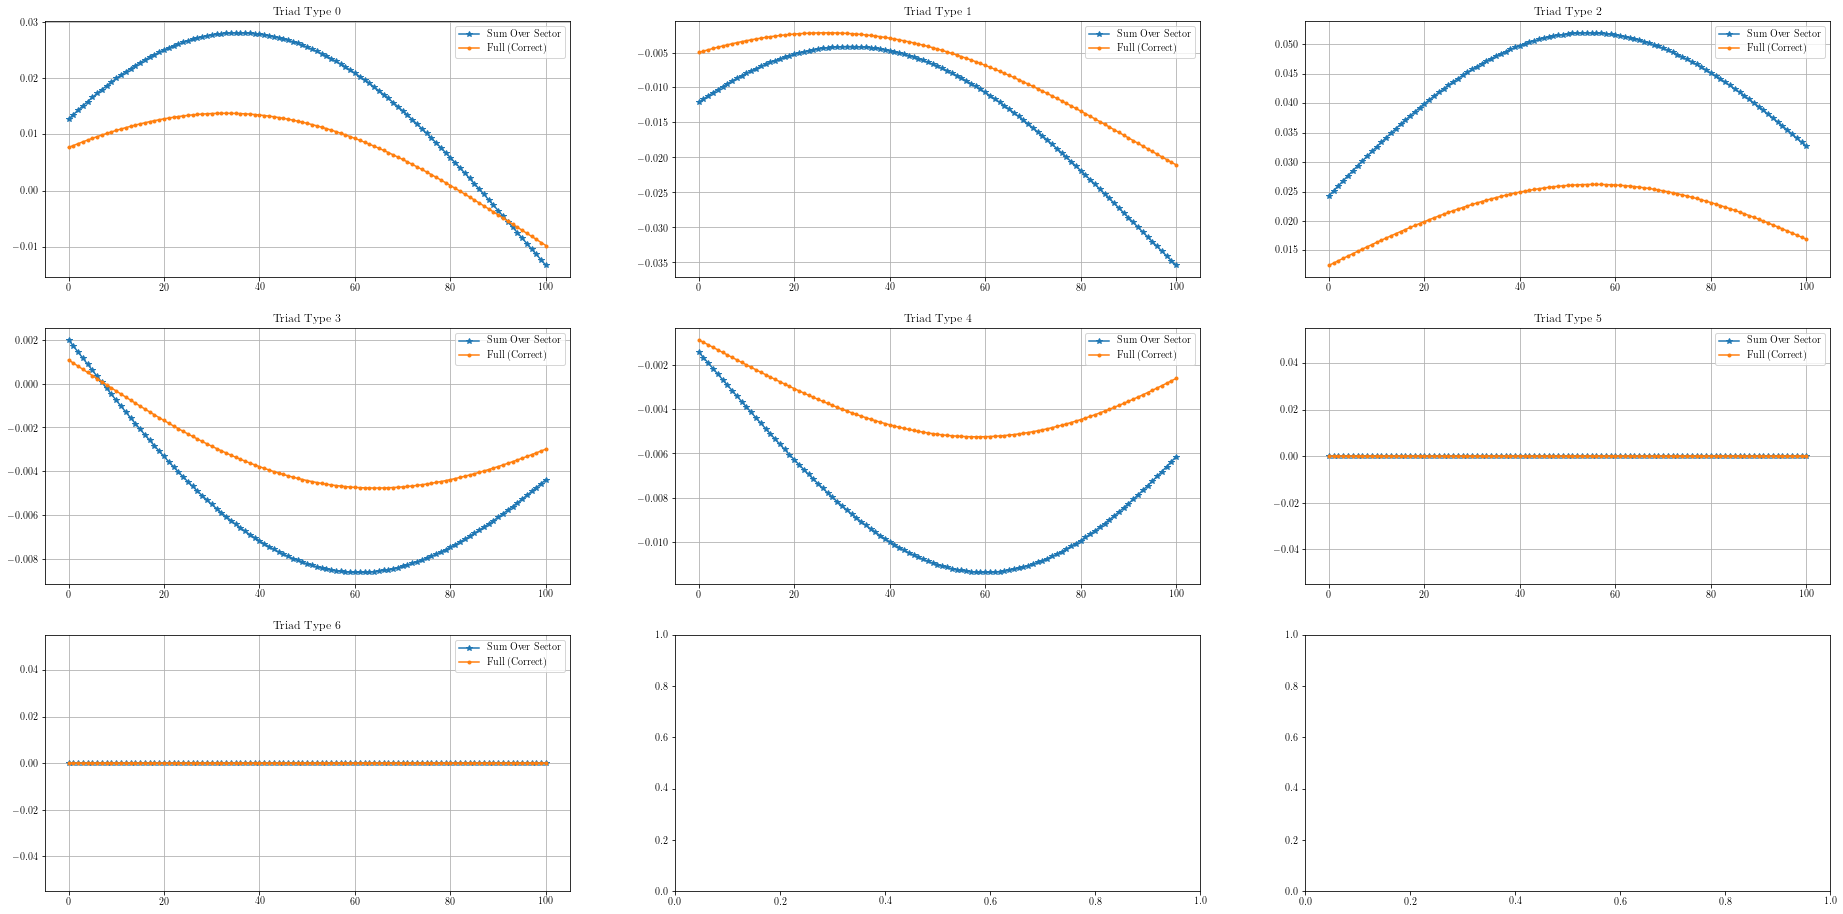

In [146]:
fig = plt.figure(figsize = (32, 16))
gs  = GridSpec(3, 3)
ax1 = []
for i in range(3):
    for j in range(3):
        ax1.append(fig.add_subplot(gs[i, j]))
for i in range(post_data.enst_flux_per_sec.shape[1]):
    ax1[i].plot(np.sum(post_data.enst_flux_per_sec[:, i, :], axis = -1) * const_fac * norm_fac, '*-')
    ax1[i].plot(post_data.enst_flux_test[:, i] * const_fac * norm_fac, '.-')
    ax1[i].set_title(r"Triad Type {}".format(i))
#     ax1[i].set_xlim(-1, 20)
    ax1[i].legend([r"Sum Over Sector", r"Full (Correct)"])
    ax1[i].grid()
    if i == 2:
        print(1 / (np.sum(post_data.enst_flux_per_sec[:, i, :], axis = -1) * const_fac * norm_fac / post_data.enst_flux_test[:, i] * const_fac * norm_fac))
plt.show()


#### Compare Individual Sectors: Direct vs NL

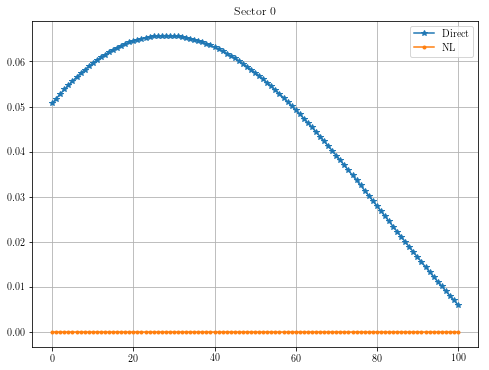

/home/ecarroll/ecpy/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf]


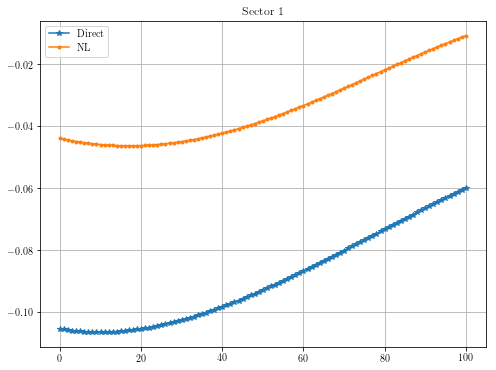

[2.3893436  2.37954726 2.37019869 2.36128936 2.3528115  2.34475808
 2.33712276 2.32989986 2.32308436 2.31667183 2.31065842 2.30504088
 2.29981648 2.29498306 2.29053893 2.28648297 2.28281451 2.27953339
 2.27663996 2.27413501 2.27201984 2.2702962  2.26896633 2.26803296
 2.26749927 2.26736896 2.2676462  2.26833567 2.26944254 2.27097253
 2.27293187 2.27532733 2.27816627 2.28145661 2.28520687 2.2894262
 2.29412439 2.2993119  2.30499988 2.31120024 2.31792561 2.32518945
 2.33300605 2.34139056 2.3503591  2.3599287  2.37011747 2.38094457
 2.39243032 2.40459623 2.41746511 2.43106113 2.44540986 2.46053845
 2.47647563 2.49325189 2.51089954 2.52945286 2.54894823 2.56942424
 2.59092191 2.61348478 2.63715915 2.66199425 2.68804247 2.71535958
 2.74400499 2.77404205 2.80553833 2.83856594 2.87320196 2.90952876
 2.94763451 2.98761362 3.02956731 3.07360419 3.11984089 3.16840283
 3.21942497 3.27305278 3.32944316 3.38876558 3.45120334 3.51695496
 3.58623572 3.65927943 3.73634045 3.81769589 3.90364821 3.99452

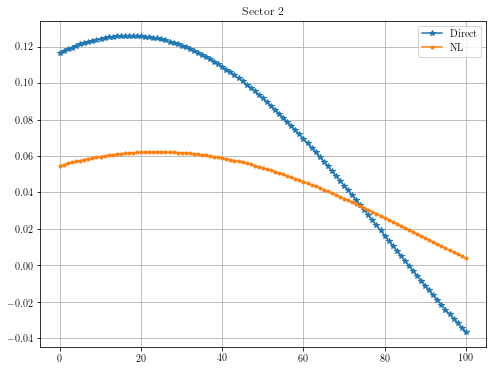

[ 2.12734466  2.12344169  2.11944248  2.11534328  2.11114029  2.10682973
  2.10240775  2.09787047  2.09321396  2.08843422  2.08352717  2.07848865
  2.0733144   2.06800006  2.06254113  2.056933    2.0511709   2.04524992
  2.03916498  2.0329108   2.02648193  2.01987269  2.01307717  2.00608923
  1.99890245  1.99151014  1.98390529  1.97608059  1.96802835  1.95974052
  1.95120864  1.94242383  1.93337673  1.92405749  1.91445569  1.90456038
  1.89435994  1.88384211  1.87299387  1.86180146  1.85025024  1.83832466
  1.82600819  1.81328321  1.80013095  1.78653137  1.77246306  1.75790309
  1.74282692  1.72720822  1.7110187   1.69422796  1.67680322  1.65870917
  1.63990765  1.62035735  1.60001357  1.57882773  1.55674707  1.5337141
  1.50966608  1.48453442  1.458244    1.43071232  1.40184861  1.37155275
  1.33971407  1.30620985  1.27090371  1.23364363  1.19425962  1.15256099
  1.10833313  1.0613336   1.01128751  0.95788183  0.90075861  0.83950658
  0.77365084  0.70264007  0.62583046  0.54246552  0.

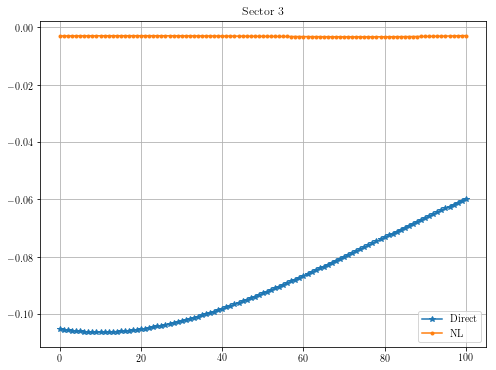

[35.43187764 35.56707333 35.69349654 35.81085706 35.9188716  36.01726538
 36.10577377 36.18414387 36.25213613 36.30952598 36.35610536 36.39168431
 36.41609242 36.42918023 36.4308206  36.42090988 36.39936909 36.36614486
 36.32121032 36.26456583 36.19623948 36.11628753 36.02479461 35.92187381
 35.80766651 35.68234211 35.54609754 35.39915665 35.24176939 35.07421082
 34.89678005 34.709799   34.51361099 34.3085793  34.09508561 33.87352832
 33.64432089 33.40789004 33.16467399 32.91512065 32.65968584 32.39883147
 32.13302384 31.86273192 31.58842569 31.31057456 31.02964589 30.74610358
 30.4604067  30.17300836 29.8843545  29.59488297 29.30502256 29.01519228
 28.72580065 28.43724514 28.14991174 27.86417457 27.58039568 27.29892489
 27.02009971 26.74424541 26.47167514 26.20269014 25.93757998 25.67662297
 25.42008654 25.16822774 24.92129378 24.6795226  24.44314357 24.21237811
 23.9874405  23.76853865 23.5558749  23.34964693 23.15004866 22.95727122
 22.77150396 22.5929355  22.42175485 22.25815258 22

In [114]:
for a in range(post_data.num_sect):
    fig = plt.figure(figsize = (8, 6))
    gs  = GridSpec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    ax.plot(post_data.enst_flux_per_sec[:, 0, a] * const_fac * norm_fac, '*-')
    ax.plot(post_data.enst_flux_C_theta[:, a], '.-')
    ax.set_title(r"Sector {}".format(a))
    ax.legend([r"Direct", r"NL"])
    ax.grid()
    plt.show()
    
    print(post_data.enst_flux_per_sec[:, 0, a] * const_fac * norm_fac / post_data.enst_flux_C_theta[:, a])

## Compare Enstorphy Flux Computed From Nonlinear Term and Directly - Ignoring Sectors

In [42]:
const_fac = 4.0 * np.pi**2 
norm_fac  = 0.5 / (sys_vars.Nx * sys_vars.Ny)**3

In [43]:
## Find the constant
print((post_data.enst_flux_test[:, 0] * const_fac * norm_fac) / np.sum(post_data.enst_flux_C_theta[:, :], axis = -1))
print()
print(const_fac)
print(norm_fac)
print(1 / (14000 * .29257143))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]

39.47841760435743
2.9802322387695312e-08
0.00024414062380790708


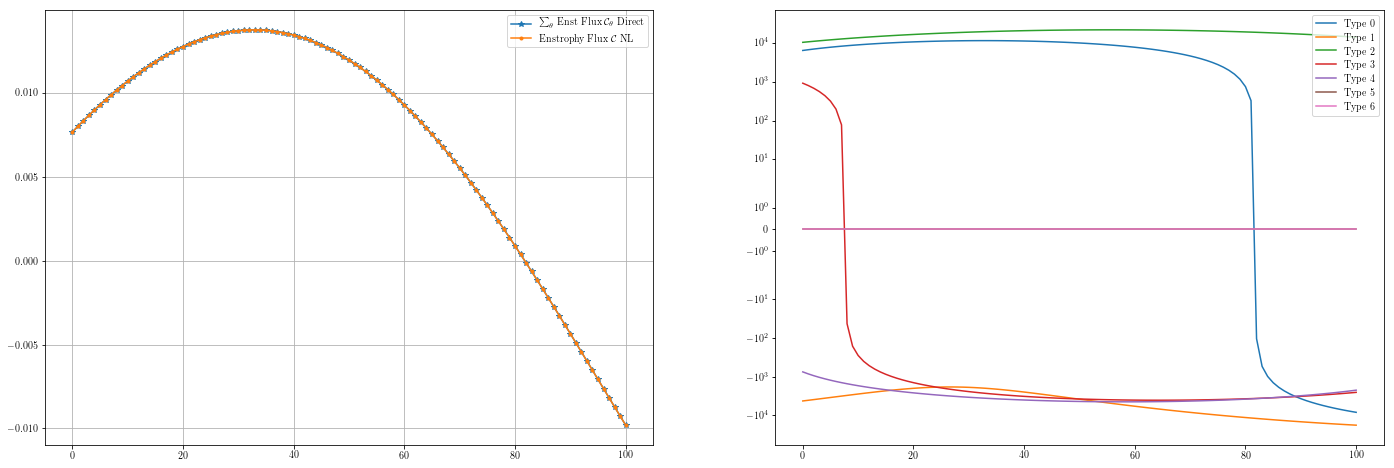

In [44]:
fig = plt.figure(figsize = (24, 8))
gs  = GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(post_data.enst_flux_test[:, 0] * const_fac * norm_fac, '*-')
ax1.plot(np.sum(post_data.enst_flux_C_theta[:, :], axis = -1), '.-')
# ax1.plot(post_data.enst_flux_C[:], '.-')
ax1.grid()
ax1.legend([r"$\sum_\theta$ Enst Flux $\mathcal{C}_\theta$ Direct", r"Enstrophy Flux $\mathcal{C}$ NL", r"Enstrophy Flux $\mathcal{C}$"])

ax2 = fig.add_subplot(gs[0, 1])
for i in range(post_data.triad_R_test.shape[1]):
    ax2.plot(post_data.enst_flux_test[:, i])
# ax2.set_yscale('log')
ax2.legend([r"Type {}".format(i) for i in range(post_data.triad_R_test.shape[1])])
ax2.set_yscale('symlog')
plt.show()

## Compare Both ways of computing Enstrophy Flux in C using Nonlinear term

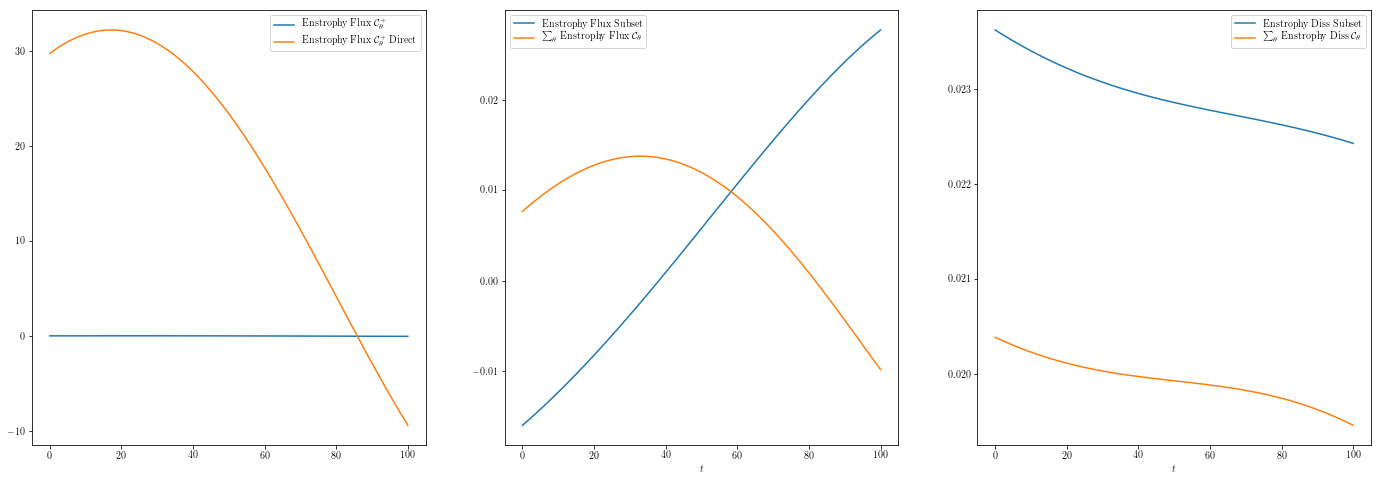

[1.15876909 1.15860161 1.15842815 1.15824883 1.15806378 1.15787315
 1.15767708 1.15747574 1.15726929 1.15705789 1.15684172 1.15662098
 1.15639585 1.15616654 1.15593325 1.15569619 1.15545558 1.15521164
 1.15496462 1.15471474 1.15446225 1.1542074  1.15395044 1.15369163
 1.15343124 1.15316954 1.1529068  1.15264331 1.15237934 1.15211518
 1.15185113 1.15158748 1.15132454 1.1510626  1.15080197 1.15054297
 1.1502859  1.15003109 1.14977884 1.14952948 1.14928334 1.14904074
 1.148802   1.14856745 1.14833743 1.14811227 1.1478923  1.14767785
 1.14746925 1.14726685 1.14707098 1.14688198 1.14670017 1.1465259
 1.14635951 1.14620132 1.14605167 1.14591091 1.14577935 1.14565734
 1.1455452  1.14544327 1.14535187 1.14527133 1.14520197 1.14514411
 1.14509808 1.14506419 1.14504275 1.14503409 1.1450385  1.14505629
 1.14508777 1.14513323 1.14519296 1.14526727 1.14535643 1.14546072
 1.14558043 1.14571582 1.14586716 1.14603471 1.14621873 1.14641948
 1.14663718 1.14687209 1.14712442 1.14739442 1.14768228 1.14798

In [55]:
const_fac = 4.0 * np.pi**2 
norm_fac  = 0.5 / (sys_vars.Nx * sys_vars.Ny)**2
theta = int(post_data.num_sect // 2)

fig = plt.figure(figsize = (24, 8))
gs  = GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(post_data.enst_flux_C_theta[:, theta])
ax1.plot(post_data.enst_flux_per_sec[:, 0, theta] * const_fac * norm_fac)
ax1.legend([r"Enstrophy Flux $\mathcal{C}_{\theta}^{+}$", r"Enstrophy Flux $\mathcal{C}_{\theta}^{+}$ Direct"])

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(post_data.enst_flux_C[:])
ax2.plot(np.sum(post_data.enst_flux_C_theta[:, :], axis = -1))
ax2.set_xlabel(r"$t$")
# ax2.set_xlim(-1, 20)
# ax2.set_yscale('log')
ax2.legend([r"Enstrophy Flux Subset", r"$\sum_\theta$ Enstrophy Flux $\mathcal{C}_\theta$", r"Total Enstrophy"])

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(post_data.enst_diss_C[:])
ax3.plot(np.sum(post_data.enst_diss_C_theta[:, :], axis = -1))
# ax3.set_yscale('log')
# ax3.set_xlim(-1, 5)
ax3.set_xlabel(r"$t$")
ax3.legend([r"Enstrophy Diss Subset", r"$\sum_\theta$ Enstrophy Diss $\mathcal{C}_\theta$", r"Total Enstrophy"])

plt.show()


print(post_data.enst_diss_C[:] / np.sum(post_data.enst_diss_C_theta[:, :], axis = -1))


## NOTE: There is a discrepency between the two methods because the way the spectrum index is computed you take the sqrt and round so some modes
## are included that aren't in C.

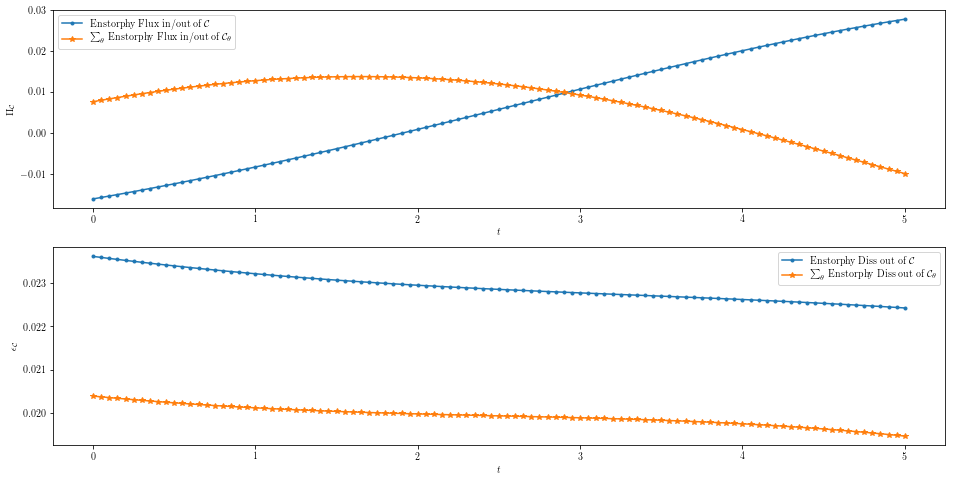

In [48]:
fig = plt.figure(figsize = (16, 8))
gs  = GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(run_data.time, post_data.enst_flux_C[:], '.-')
ax1.plot(run_data.time, np.sum(post_data.enst_flux_C_theta[:, 1:], axis = 1), '*-')
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax1.legend([r"Enstorphy Flux in/out of $\mathcal{C}$", r"$\sum_{\theta}$ Enstorphy Flux in/out of $\mathcal{C}_\theta$"])
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(run_data.time, post_data.enst_diss_C[:], '.-')
ax2.plot(run_data.time, np.sum(post_data.enst_diss_C_theta[:, 1:], axis = 1), '*-')
ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"$\epsilon_{\mathcal{C}}$")
ax2.legend([r"Enstorphy Diss out of $\mathcal{C}$", r"$\sum_{\theta}$ Enstorphy Diss out of $\mathcal{C}_\theta$"])
plt.show()

## Compare Spectra Between Post & Solver 

In [50]:
 t = 50

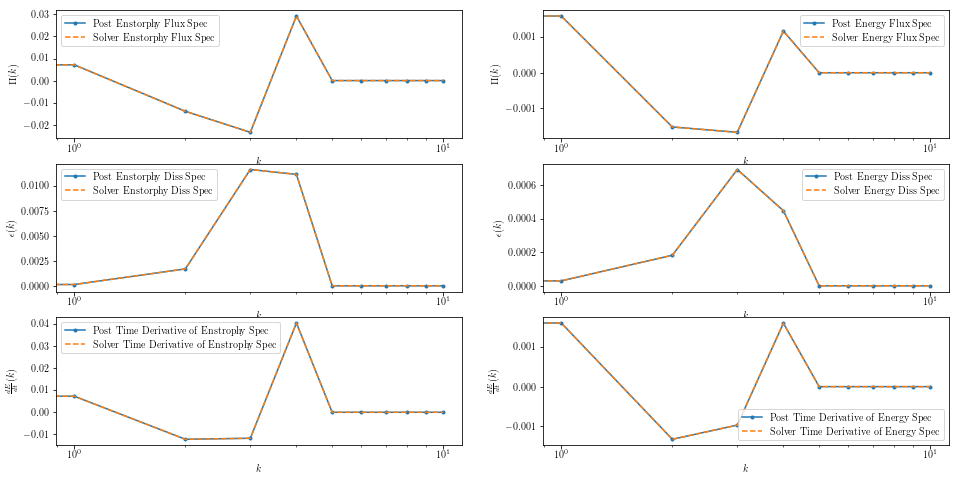

In [51]:
fig = plt.figure(figsize = (16, 8))
gs  = GridSpec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(post_data.enst_flux_spec[t, 1:], '.-')
ax1.plot(spec_data.enst_flux_spectrum[t, 1:], '--')
ax1.set_xlabel(r"$k$")
ax1.set_ylabel(r"$\Pi(k)$")
ax1.set_xscale('log')
ax1.legend([r"Post Enstorphy Flux Spec", r"Solver Enstorphy Flux Spec"])
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(post_data.enrg_flux_spec[t, 1:], '.-')
ax2.plot(spec_data.enrg_flux_spectrum[t, 1:], '--')
ax2.set_xlabel(r"$k$")
ax2.set_ylabel(r"$\Pi(k)$")
ax2.set_xscale('log')
ax2.legend([r"Post Energy Flux Spec", r"Solver Energy Flux Spec"])
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(post_data.enst_diss_spec[t, 1:], '.-')
ax3.plot(spec_data.enst_diss_spectrum[t, 1:] , '--')
ax3.set_xlabel(r"$k$")
ax3.set_ylabel(r"$\epsilon(k)$")
ax3.set_xscale('log')
ax3.legend([r"Post Enstorphy Diss Spec", r"Solver Enstorphy Diss Spec"])
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(post_data.enrg_diss_spec[t, 1:], '.-')
ax4.plot(spec_data.enrg_diss_spectrum[t, 1:] , '--')
ax4.set_xlabel(r"$k$")
ax4.set_ylabel(r"$\epsilon(k)$")
ax4.set_xscale('log')
ax4.legend([r"Post Energy Diss Spec", r"Solver Energy Diss Spec"])
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(post_data.d_enst_dt_spec[t, 1:], '.-')
ax5.plot(spec_data.d_enst_dt_spectrum[t, 1:] , '--')
ax5.set_xlabel(r"$k$")
ax5.set_ylabel(r"$\frac{d E}{dt}(k)$")
ax5.set_xscale('log')
ax5.legend([r"Post Time Derivative of Enstrophy Spec", r"Solver Time Derivative of Enstrophy Spec"])
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(post_data.d_enrg_dt_spec[t, 1:], '.-')
ax6.plot(spec_data.d_enrg_dt_spectrum[t, 1:] , '--')
ax6.set_xlabel(r"$k$")
ax6.set_ylabel(r"$\frac{d E}{dt}(k)$")
ax6.set_xscale('log')
ax6.legend([r"Post Time Derivative of Energy Spec", r"Solver Time Derivative of Energy Spec"])
plt.show()

## Compare Enstorphy Flux in C_theta - Combing 1D and 2D Contributions

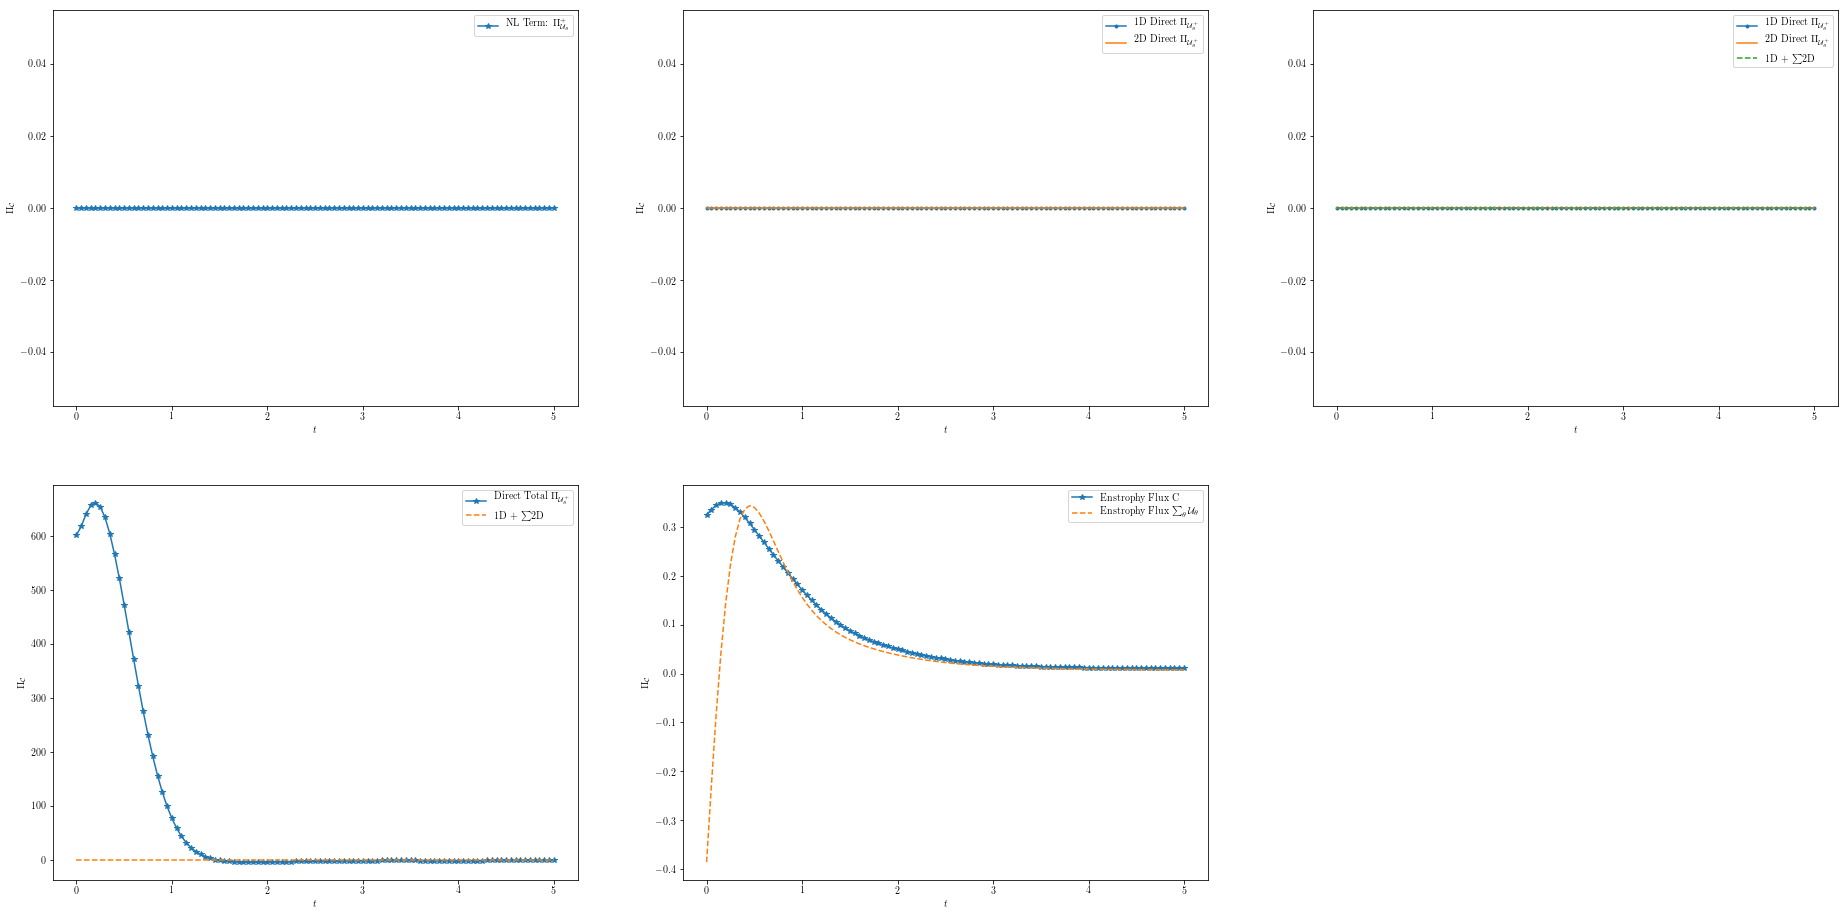

In [51]:
const_fac = 4.0 * np.pi**2 
norm_fac  = 0.5 / (sys_vars.Nx * sys_vars.Ny)**2

theta = int(post_data.num_sect//2)

fig = plt.figure(figsize = (32, 16))
gs  = GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
# ax1.plot(run_data.time, post_data.enst_flux_C_theta[:, theta],  '.-')
ax1.plot(run_data.time, post_data.enst_flux_C_theta[:, -1], '*-' )
# ax1.plot(run_data.time, post_data.enst_flux_per_sec[:, 0, theta], '*-') #  * norm_fac * const_fac / 10
# ax1.plot(run_data.time, post_data.enst_flux_per_sec_1d[:, 0, theta] * norm_fac * const_fac, '.-')
# ax1.plot(run_data.time, np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) * norm_fac * const_fac)
# ax1.plot(run_data.time, (np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) + post_data.enst_flux_per_sec_1d[:, 0, theta])* norm_fac * const_fac, '--')
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax1.legend([r"NL Term: $\Pi_{\mathcal{U}_\theta}^{+}$", r"Direct Total $\Pi_{\mathcal{U}_\theta}^{+}$"])

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(run_data.time, post_data.enst_flux_per_sec_1d[:, 0, theta] * norm_fac * const_fac, '.-')
ax2.plot(run_data.time, np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) * norm_fac * const_fac)
# ax2.plot(run_data.time, (np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) + post_data.enst_flux_per_sec_1d[:, 0, theta])* norm_fac * const_fac, '--')
ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax2.legend([r"1D Direct $\Pi_{\mathcal{U}_\theta^{+}}$", r"2D Direct $\Pi_{\mathcal{U}_\theta^{+}}$", r"1D + $\sum$2D"])

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(run_data.time, post_data.enst_flux_per_sec_1d[:, 0, theta] * norm_fac * const_fac, '.-')
ax3.plot(run_data.time, np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) * norm_fac * const_fac)
ax3.plot(run_data.time, (np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) + post_data.enst_flux_per_sec_1d[:, 0, theta])* norm_fac * const_fac, '--')
ax3.set_xlabel(r"$t$")
ax3.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax3.legend([r"1D Direct $\Pi_{\mathcal{U}_\theta^{+}}$", r"2D Direct $\Pi_{\mathcal{U}_\theta^{+}}$", r"1D + $\sum$2D"])

ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(run_data.time, post_data.enst_flux_per_sec[:, 0, theta] * norm_fac * const_fac / 10, '*-')
ax4.plot(run_data.time, (np.sum(post_data.enst_flux_per_sec_2d[:, 0, theta, :], axis = -1) + post_data.enst_flux_per_sec_1d[:, 0, theta])* norm_fac * const_fac, '--')
ax4.set_xlabel(r"$t$")
ax4.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax4.legend([r"Direct Total $\Pi_{\mathcal{U}_\theta^{+}}$", r"1D + $\sum$2D"])

ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(run_data.time, post_data.enst_flux_C[:], '*-')
ax5.plot(run_data.time, np.sum(post_data.enst_flux_C_theta[:, :], axis = -1), '--')
ax5.set_xlabel(r"$t$")
ax5.set_ylabel(r"$\Pi_{\mathcal{C}}$")
ax5.legend([r"Enstrophy Flux C", r"Enstrophy Flux $\sum_\theta \mathcal{U}_\theta$"])
plt.show()

# r"$\Pi_{\mathcal{U}_\theta^{+}}$: Enstorphy Flux in/out of $\mathcal{U}_\theta^{+}$", 

In [ ]:
print(post_data.enst_flux_C_theta[-1, int(post_data.num_sect // 4):int(3 * post_data.num_sect // 4)])
print(post_data.enst_flux_C_theta[-1, :])
print(np.sum(post_data.enst_flux_C_theta[:, int(post_data.num_sect // 4):int(3 * post_data.num_sect // 4)], axis = -1))


n_theta   = post_data.num_sect
dtheta    = 2.0 * np.pi / n_theta
theta     = np.arange(-np.pi, np.pi + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5
theta     = mid_theta[:]
Nx = sys_vars.Nx
Ny = sys_vars.Ny
kx = np.arange(-Nx//2 + 1, Nx//2 + 1, 1)
ky = np.arange(-Ny//2 + 1, Nx//2 + 1, 1)
kmax = Nx//3
kmax_sqr = kmax**2
C_frac = 0.75
kmax_C = int(np.ceil(C_frac * kmax))
kmax_C_sqr = kmax_C ** 2
R = kmax
angle = np.linspace(0.0, 2.0 * np.pi, 256)
x = R * np.cos(angle)
y = R * np.sin(angle)

plt.figure(figsize = (13, 12))
plt.plot(x, y, 'k--', alpha = 0.2)
plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
for aa in range(post_data.num_sect):
    ## Plot sectors
    plt.plot([0, R*np.cos(theta[aa] - dtheta/2)], [0, R*np.sin(theta[aa] - dtheta/2)], 'r--', alpha = 0.1)
    plt.plot([0, R*np.cos(theta[aa] + dtheta/2)], [0, R*np.sin(theta[aa] + dtheta/2)], 'r--', alpha = 0.1)
#     if post_data.enst_flux_C_theta[-1, aa] != 0.0:
    if aa >= int(post_data.num_sect // 4) and aa < int(3 * post_data.num_sect // 4):
        plt.plot([0, R*np.cos(theta[aa])], [0, R*np.sin(theta[aa])], 'o-', alpha = 1, color = "b")
        

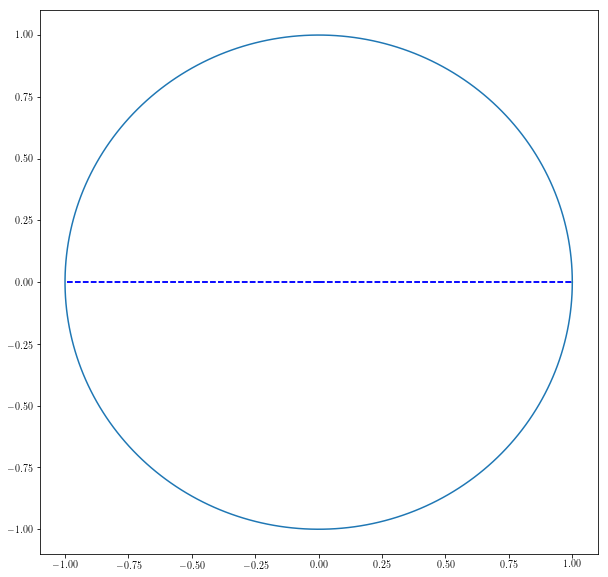

In [274]:
R = 1
angle = np.linspace(0.0, 2.0 * np.pi, 256)

x = R * np.cos(angle)
y = R * np.sin(angle)
dtheta = 2*np.pi/post_data.num_sect
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y)
for i, a in enumerate(post_data.theta):
    plt.plot([0.0, R * np.cos(a - dtheta/2)], [0.0, R * np.sin(a - dtheta/2)], 'b--')
    plt.plot([0.0, R * np.cos(a + dtheta/2)], [0.0, R * np.sin(a + dtheta/2)], 'b--')    

In [38]:
Nx     = sys_vars.Nx
Ny     = sys_vars.Ny
kmax   = post_data.kmax
C_kmax = post_data.kmax_C

for k3_x in range(-Nx//2 + 1, Nx//2 + 1):
    for k3_y in range(-Nx//2 + 1, Nx//2 + 1):
        
        ## Compute polar data for k3
        k3_sqr = k3_x**2 + k3_y**2
        k3_ang = np.arctan2(k3_x, k3_y)
        k3_ang_neg = np.arctan2(-k3_x, -k3_y)
        
        if (k3_sqr > C_kmax):
            for k1_x in range(-Nx//2 + 1, Nx//2 + 1):
                for k1_y in range(-Nx//2 + 1, Nx//2 + 1):
                    
                    ## Compute polar data for k1
                    k1_sqr = k1_x**2 + k1_y**2
                    k1_ang = np.arctan2(k1_x, k1_y)
                    k1_ang_neg = np.arctan2(-k1_x, -k1_y)
                    
                    ## Compute polar data for k2
                    k2_x   = k3_x - k1_x
                    k2_y   = k3_y - k1_y
                    k2_sqr = k2_x**2 + k2_y**2
                    k2_ang = np.arctan2(k2_x, k2_y)
                    k2_ang_neg = np.arctan2(-k2_x, -k2_y)
                    
        elif (k3_sqr <= C_kmax):
            for k1_x in range(-Nx//2 + 1, Nx//2 + 1):
                for k1_y in range(-Nx//2 + 1, Nx//2 + 1):
                    
                    ## Compute polar data for k1
                    k1_sqr = k1_x**2 + k1_y**2
                    k1_ang = np.arctan2(k1_x, k1_y)
                    k1_ang_neg = np.arctan2(-k1_x, -k1_y)
                    
                    ## Compute polar data for k2
                    k2_x   = k3_x - k1_x
                    k2_y   = k3_y - k1_y
                    k2_sqr = k2_x**2 + k2_y**2
                    k2_ang = np.arctan2(k2_x, k2_y)
                    k2_ang_neg = np.arctan2(-k2_x, -k2_y)